<a href="https://colab.research.google.com/github/sree181/alibi/blob/master/colab-gt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing graph-tool (https://graph-tool.skewed.de)

---


To import a library that's not in Colaboratory by default, you can use `!apt-get install`.

But since graph-tool is not in the official repository, we need to add it to the list.

In [1]:
!wget https://downloads.skewed.de/skewed-keyring/skewed-keyring_1.0_all_$(lsb_release -s -c).deb
!dpkg -i skewed-keyring_1.0_all_$(lsb_release -s -c).deb
!echo "deb [signed-by=/usr/share/keyrings/skewed-keyring.gpg] https://downloads.skewed.de/apt $(lsb_release -s -c) main" > /etc/apt/sources.list.d/skewed.list
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

--2024-12-16 16:39:39--  https://downloads.skewed.de/skewed-keyring/skewed-keyring_1.0_all_jammy.deb
Resolving downloads.skewed.de (downloads.skewed.de)... 49.12.93.194
Connecting to downloads.skewed.de (downloads.skewed.de)|49.12.93.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23192 (23K) [application/x-debian-package]
Saving to: ‘skewed-keyring_1.0_all_jammy.deb’

skewed-keyring_1.0_ 100%[===================>]  22.65K  95.5KB/s    in 0.2s    

2024-12-16 16:39:41 (95.5 KB/s) - ‘skewed-keyring_1.0_all_jammy.deb’ saved [23192/23192]

Selecting previously unselected package skewed-keyring.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack skewed-keyring_1.0_all_jammy.deb ...
Unpacking skewed-keyring (1.0) ...
Setting up skewed-keyring (1.0) ...
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InR

In [3]:
# Colab uses a Python install that deviates from the system's! Bad colab! We need some workarounds.
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  python3-cairo*
0 upgraded, 0 newly installed, 1 to remove and 56 not upgraded.
After this operation, 310 kB disk space will be freed.
(Reading database ... 132040 files and directories currently installed.)
Removing python3-cairo:amd64 (1.20.1-3build1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev libglib2.0-dev libglib2.0-dev-bin
  libice-dev liblzo2-2 libmount-dev libmount1 libpixman-1-dev libselinux1-dev libsepol-dev
  lib

# Now we can use graph-tool as any other Python module



In [4]:
from graph_tool.all import *

g = collection.data["celegansneural"]
state = minimize_nested_blockmodel_dl(g)

# Inline drawing works too!

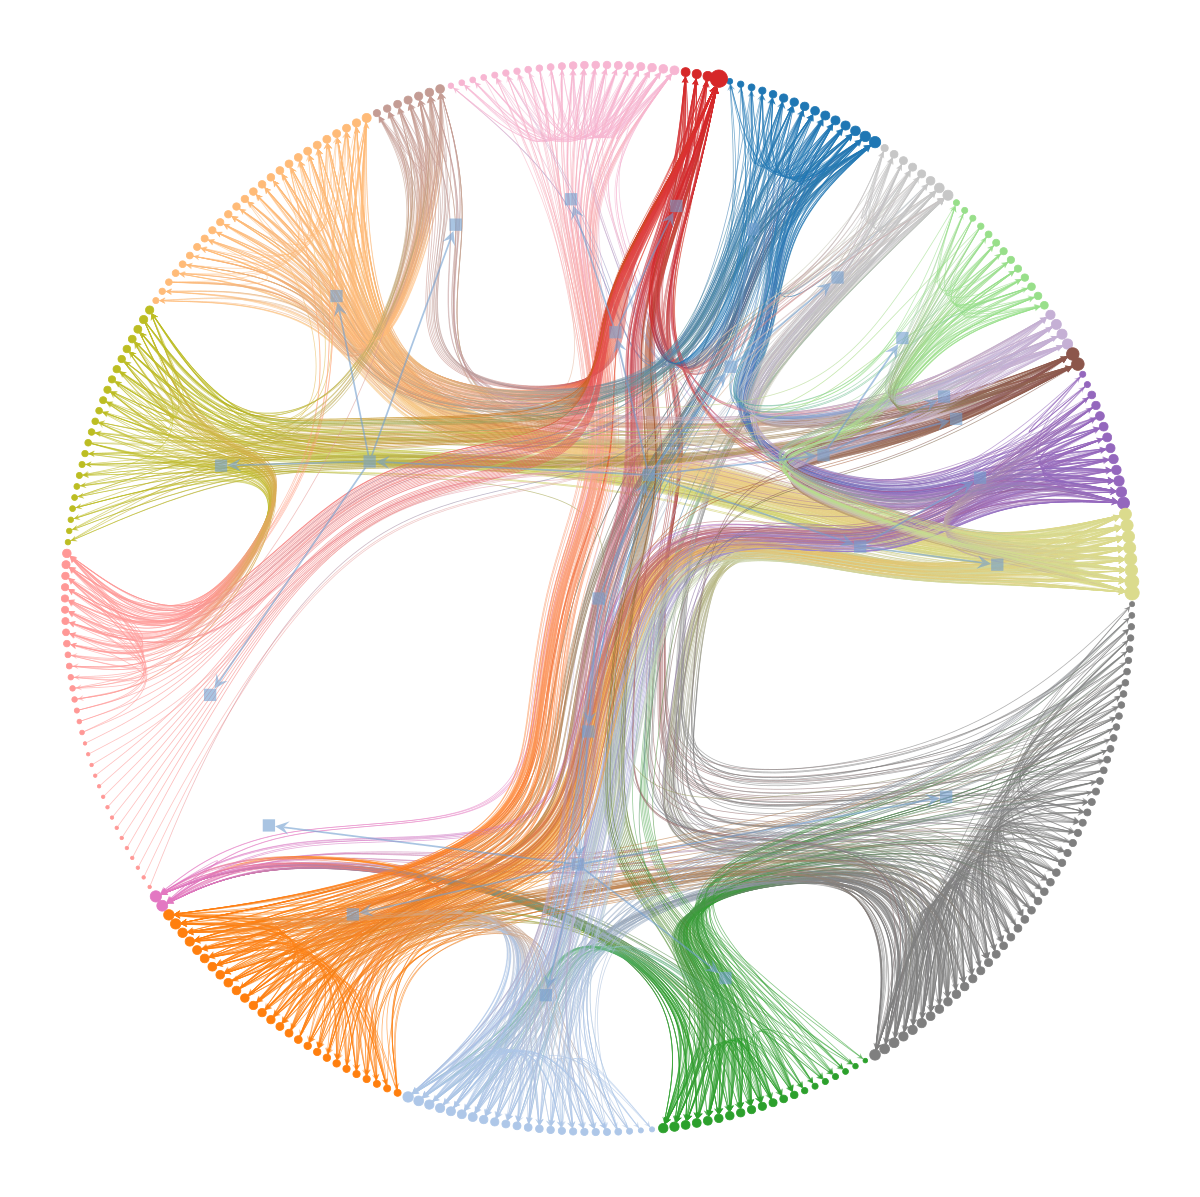

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7dc2584b7d90, at 0x7dc2093edf90>,
 <GraphView object, directed, with 324 vertices and 323 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7dc2581a7d90, at 0x7dc2005e2b30>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7dc2581a7d90, at 0x7dc2093ee9e0>, False), at 0x7dc2581a7d90>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7dc2581a7d90, at 0x7dc2581a4fd0>)

In [5]:
state.draw()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

raph = pd.read_csv("/content/drive/MyDrive/darkweb/raphtory_df.csv")
raph.head()

,Unnamed: 0,src,dst,time,drugs
0,122432,headhunted,patashnik,1308398400,Meth
1,7591,BlueEyedGreySkies,dousche,1308506400,LSD
2,104865,Rentner,shai1973,1308582000,LSD
3,83299,Nuggets,eclipsin,1308592800,COCAINE
4,92115,LiberPater,Raoul Duke,1308668400,COCAINE


In [8]:
raphor = raph[raph["drugs"]=='LSD'].drop(columns=['Unnamed: 0','time','drugs'])
raphor.head()

,src,dst
1,BlueEyedGreySkies,dousche
2,Rentner,shai1973
5,Phant,dirtybiscuitzz718
7,Flyhigh,oldcactushand
22,BoostedL,MetalSlugg


In [9]:
import graph_tool.all as gt
g = gt.Graph()
edgelist = raphor.values
# Add edges
node_id = g.add_edge_list(edgelist, hashed=True)


In [10]:
# Access node id of each vertex
# for node in range(g.num_vertices()):
#     print("Node {} has id: {}".format(node, node_id[node]))
g.vertex_properties['node_id'] = node_id

In [11]:
# for v in g.vertices():
#     print(v)
# for e in g.edges():
#     print(e)
